In [19]:
# ===========================================
#      PHASE 1 — DATA EXPLORATION / ANALYSIS
# ===========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1
from tqdm import tqdm

In [20]:
# -------------------------------------------
# 1. Load Dataset
# -------------------------------------------

df = pd.read_csv("data/f1_ml_laps_dataset.csv")


print("Dataset loaded. Shape:", df.shape)
df.head()

Dataset loaded. Shape: (23983, 31)


,season,gp_name,session_name,session_type,driver,team,lap_number,lap_time,sector_1_time,sector_2_time,sector_3_time,position,track_status,is_pit_lap,compound,stint,tyre_life,fresh_tyre,speed_mean,speed_max,throttle_mean,brake_mean,rpm_mean,rpm_max,drs_activations,air_temp,track_temp,humidity,wind_speed,wind_dir,pressure
0,2023,Bahrain Grand Prix,Race,Race,VER,Red Bull Racing,1,99.019,NaN,42.414,23.842,1,12,False,SOFT,1,4,False,185.071053,287,59.876316,0.202632,9993.065789,12317,380,27.3,31.2,22,0.6,190,1016.7
1,2023,Bahrain Grand Prix,Race,Race,VER,Red Bull Racing,2,97.974,31.342,42.504,24.128,1,12,False,SOFT,1,5,False,195.407713,298,60.225895,0.203857,9773.179063,12063,363,27.3,31.1,22,0.0,208,1016.7
2,2023,Bahrain Grand Prix,Race,Race,VER,Red Bull Racing,3,98.006,31.388,42.469,24.149,1,1,False,SOFT,1,6,False,198.095109,298,62.290761,0.184783,9756.970109,11795,0,27.3,31.2,22,0.6,170,1016.7
3,2023,Bahrain Grand Prix,Race,Race,VER,Red Bull Racing,4,97.976,31.271,42.642,24.063,1,1,False,SOFT,1,7,False,195.786842,299,62.092105,0.200000,9723.621053,11960,0,27.2,31.1,22,0.8,236,1016.9
4,2023,Bahrain Grand Prix,Race,Race,VER,Red Bull Racing,5,98.035,31.244,42.724,24.067,1,1,False,SOFT,1,8,False,197.120879,301,60.884615,0.206044,9710.263736,11911,0,27.2,31.0,22,1.0,206,1016.7


In [21]:
# Check missing values
df.isna().sum()

season               0
gp_name              0
session_name         0
session_type         0
driver               0
team                 0
lap_number           0
lap_time             0
sector_1_time      430
sector_2_time        0
sector_3_time        0
position             0
track_status         0
is_pit_lap           0
compound             0
stint                0
tyre_life            0
fresh_tyre           0
speed_mean           0
speed_max            0
throttle_mean        0
brake_mean           0
rpm_mean             0
rpm_max              0
drs_activations      0
air_temp             0
track_temp           0
humidity             0
wind_speed           0
wind_dir             0
pressure             0
dtype: int64

In [22]:
# Summary statistics for numerical columns
df.describe()

,season,lap_number,lap_time,sector_1_time,sector_2_time,sector_3_time,position,track_status,stint,tyre_life,speed_mean,speed_max,throttle_mean,brake_mean,rpm_mean,rpm_max,drs_activations,air_temp,track_temp,humidity,wind_speed,wind_dir,pressure
count,23983.0,23983.000000,23983.000000,23553.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000,23983.000000
mean,2023.0,30.739524,91.342874,28.515952,35.522240,27.188464,9.785014,8.649835,2.253388,14.310512,197.965618,310.279114,61.826463,0.201752,9960.520691,12116.413710,60.339407,24.356607,34.926723,51.700663,1.719251,173.904849,984.342459
std,0.0,18.357582,13.548306,7.171125,7.471669,6.134703,5.403869,83.255146,1.051885,10.111580,26.392298,18.232896,9.789662,0.045678,486.722855,262.781212,120.122569,4.412113,7.262813,14.746913,0.984053,89.929540,55.294055
min,2023.0,1.000000,67.012000,16.835000,17.589000,16.913000,1.000000,1.000000,1.000000,1.000000,83.446655,186.000000,13.590074,0.040853,6965.895954,9884.000000,0.000000,15.700000,17.500000,18.000000,0.000000,0.000000,778.500000
25%,2023.0,15.000000,80.895000,23.463000,30.321500,23.160500,5.000000,1.000000,1.000000,7.000000,184.499216,301.000000,57.445543,0.168262,9760.636583,11931.000000,0.000000,20.500000,30.200000,42.000000,1.100000,113.000000,988.200000
50%,2023.0,30.000000,90.068000,28.998000,34.809000,25.791000,10.000000,1.000000,2.000000,12.000000,201.979112,308.000000,63.843182,0.196881,10047.873760,12077.000000,0.000000,25.400000,33.300000,54.000000,1.500000,162.000000,1008.000000
75%,2023.0,45.000000,99.408500,31.717000,41.227500,30.767000,14.000000,1.000000,3.000000,20.000000,217.183469,324.000000,68.310580,0.228749,10289.488140,12261.000000,66.000000,27.300000,40.700000,62.000000,2.200000,235.000000,1012.900000
max,2023.0,78.000000,174.634000,92.283000,81.925000,73.128000,20.000000,2671.000000,8.000000,68.000000,246.640625,366.000000,93.722714,0.640118,10929.035260,13520.000000,659.000000,31.500000,50.200000,80.000000,6.600000,359.000000,1018.500000


In [23]:
# Check unique drivers, teams, compounds
print("Drivers:", df["driver"].unique())
print("Teams:", df["team"].unique())
print("Compounds:", df["compound"].unique())

Drivers: ['VER' 'GAS' 'PER' 'ALO' 'LEC' 'STR' 'SAR' 'MAG' 'DEV' 'TSU' 'ALB' 'ZHO'
 'HUL' 'OCO' 'NOR' 'HAM' 'SAI' 'RUS' 'BOT' 'PIA' 'RIC' 'LAW']
Teams: ['Red Bull Racing' 'Alpine' 'Aston Martin' 'Ferrari' 'Williams'
 'Haas F1 Team' 'AlphaTauri' 'Alfa Romeo' 'McLaren' 'Mercedes']
Compounds: ['SOFT' 'HARD' 'MEDIUM' 'INTERMEDIATE' 'WET']


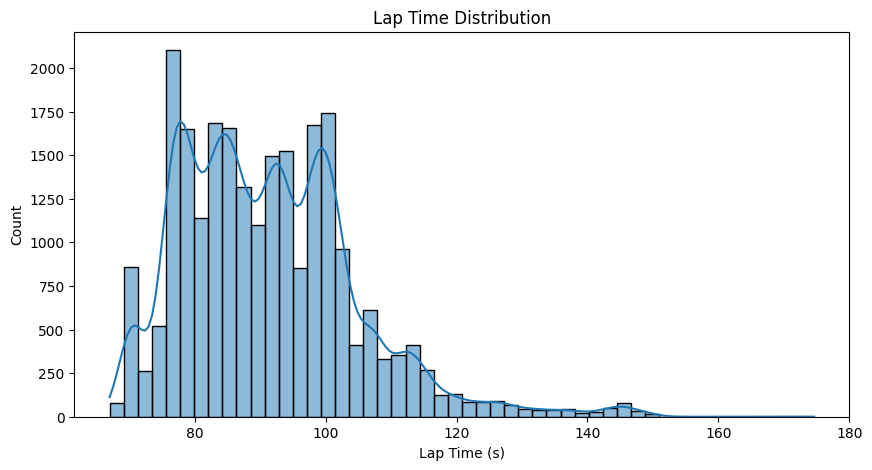

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(df["lap_time"], bins=50, kde=True)
plt.title("Lap Time Distribution")
plt.xlabel("Lap Time (s)")
plt.show()

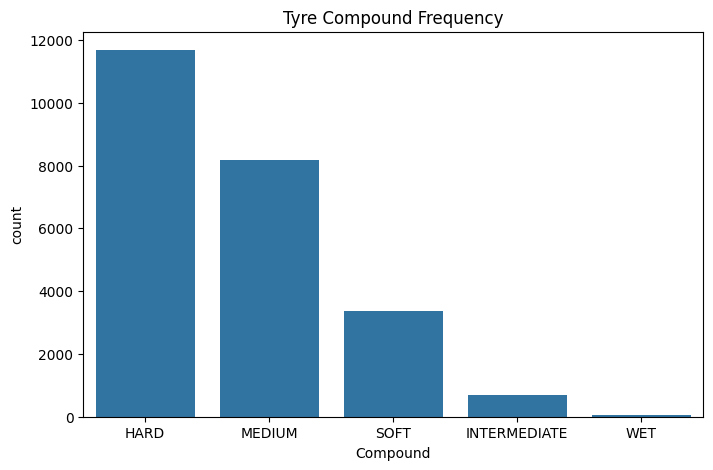

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="compound", order=df["compound"].value_counts().index)
plt.title("Tyre Compound Frequency")
plt.xlabel("Compound")
plt.show()

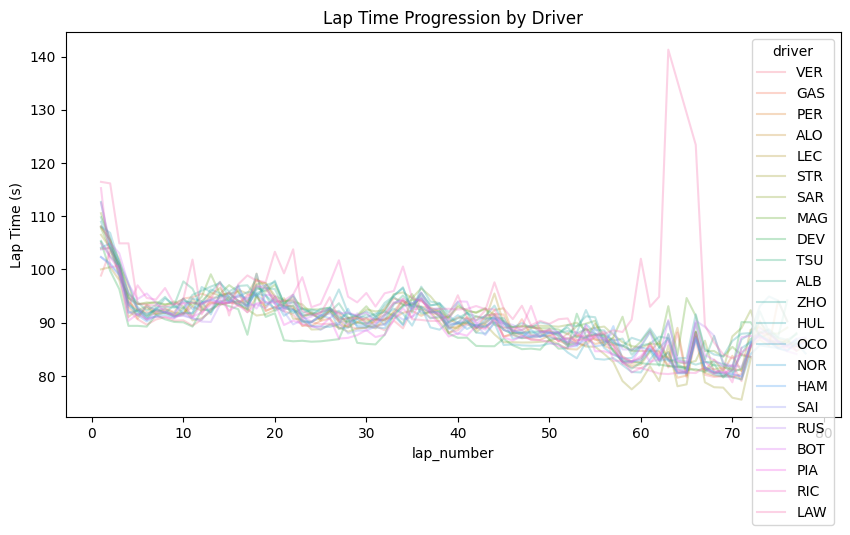

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="lap_number", y="lap_time", hue="driver", errorbar=None, alpha=0.3)
plt.title("Lap Time Progression by Driver")
plt.ylabel("Lap Time (s)")
plt.show()

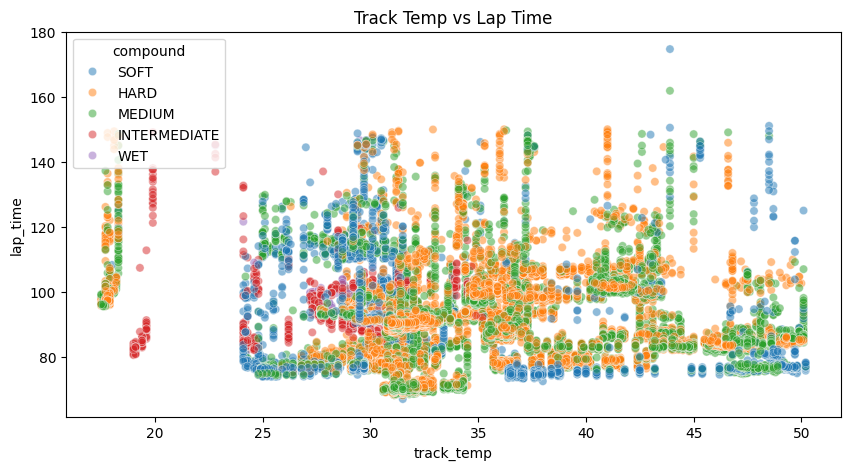

In [27]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="track_temp", y="lap_time", hue="compound", alpha=0.5)
plt.title("Track Temp vs Lap Time")
plt.show()

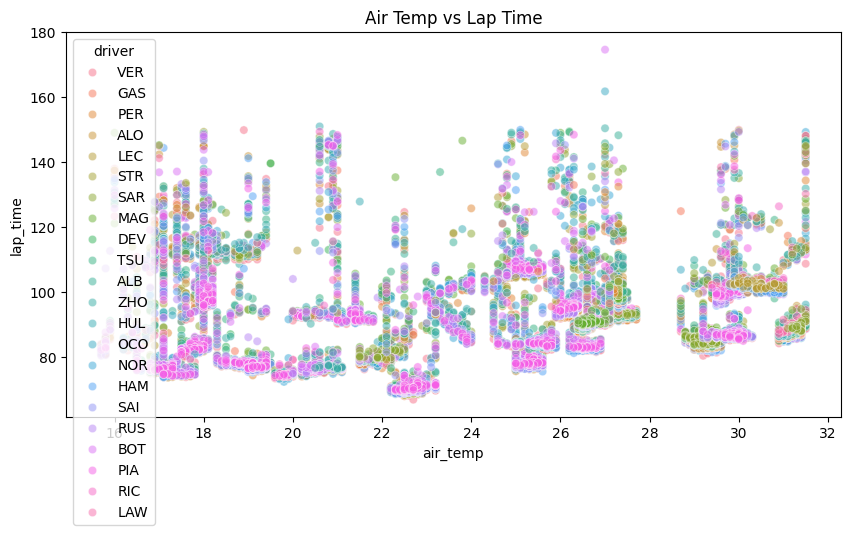

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x="air_temp", y="lap_time", hue="driver", alpha=0.5)
plt.title("Air Temp vs Lap Time")
plt.show()

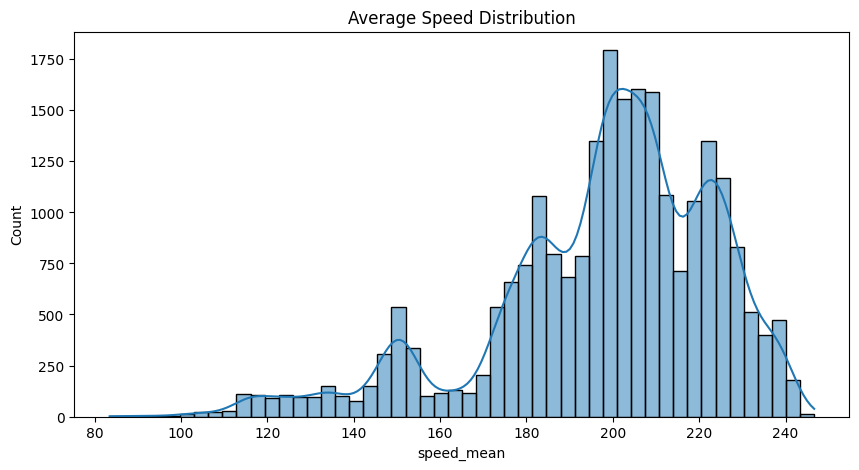

In [29]:
plt.figure(figsize=(10,5))
sns.histplot(df["speed_mean"], bins=50, kde=True)
plt.title("Average Speed Distribution")
plt.show()

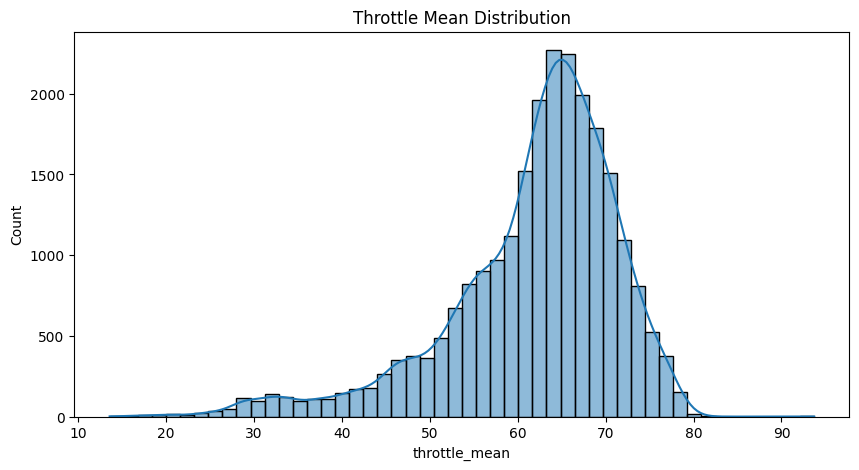

In [30]:
plt.figure(figsize=(10,5))
sns.histplot(df["throttle_mean"], bins=50, kde=True)
plt.title("Throttle Mean Distribution")
plt.show()

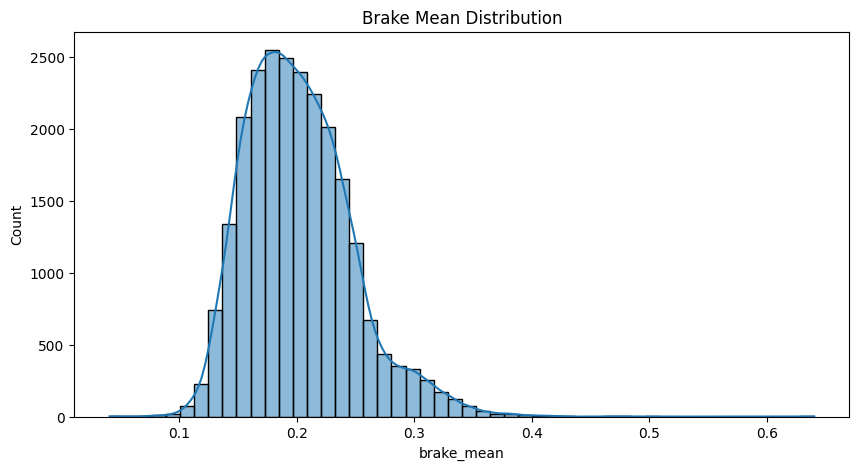

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df["brake_mean"], bins=50, kde=True)
plt.title("Brake Mean Distribution")
plt.show()

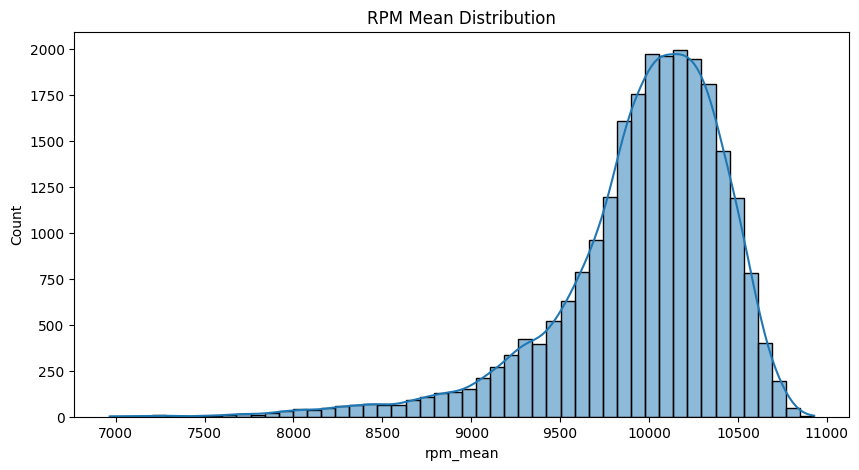

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df["rpm_mean"], bins=50, kde=True)
plt.title("RPM Mean Distribution")
plt.show()

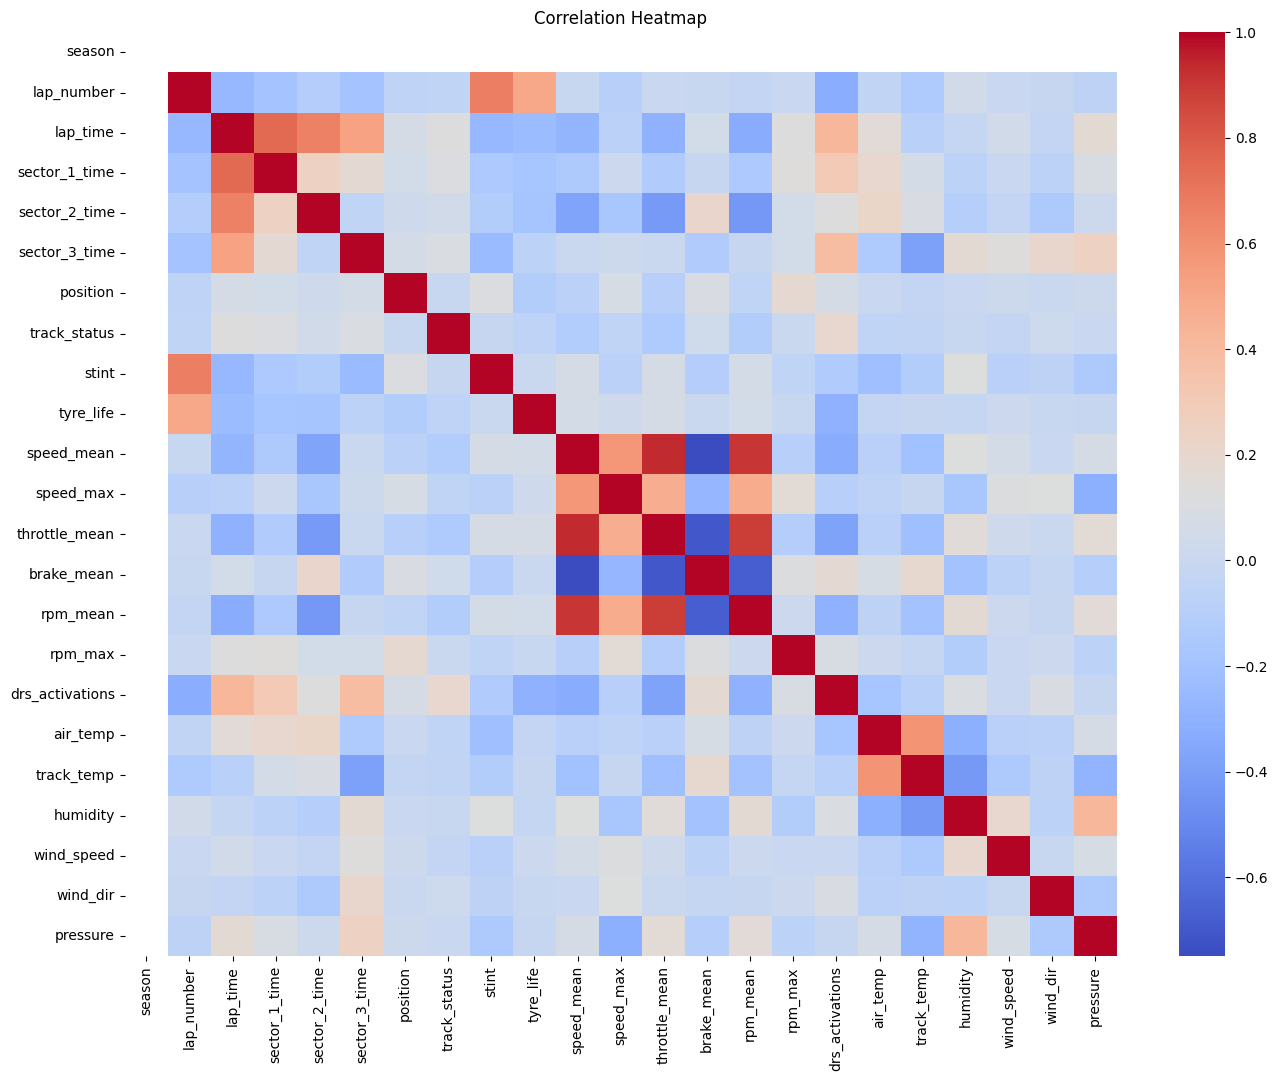

In [33]:
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(16,12))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [34]:
corr_lap = corr["lap_time"].sort_values(ascending=False)
corr_lap.head(20)

lap_time           1.000000
sector_1_time      0.751240
sector_2_time      0.658705
sector_3_time      0.523543
drs_activations    0.420482
pressure           0.169228
air_temp           0.158352
track_status       0.131360
rpm_max            0.126518
position           0.076617
brake_mean         0.055376
wind_speed         0.047414
humidity          -0.018279
wind_dir          -0.027973
speed_max         -0.077850
track_temp        -0.092839
tyre_life         -0.237087
lap_number        -0.257951
stint             -0.263829
speed_mean        -0.283608
Name: lap_time, dtype: float64

In [35]:
driver_summary = df.groupby("driver")["lap_time"].mean().sort_values()
driver_summary

driver
DEV    88.779928
PIA    89.761142
VER    89.903410
STR    90.232058
SAI    90.242527
HAM    90.648506
OCO    90.713555
PER    90.791529
NOR    90.834121
ALO    90.972112
RUS    91.308024
TSU    91.398892
LEC    91.623064
GAS    91.695455
BOT    92.207017
ZHO    92.303850
ALB    92.370996
RIC    92.758278
MAG    92.834496
HUL    92.913877
SAR    92.975646
LAW    94.284129
Name: lap_time, dtype: float64

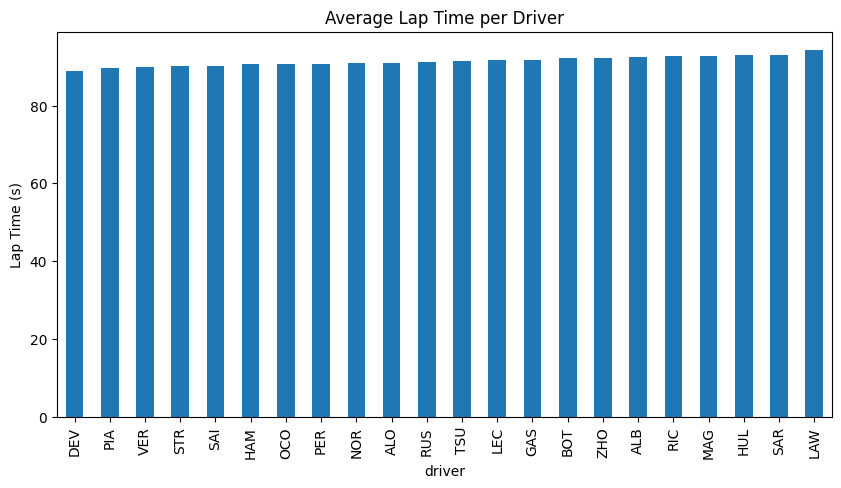

In [36]:
plt.figure(figsize=(10,5))
driver_summary.plot(kind="bar")
plt.title("Average Lap Time per Driver")
plt.ylabel("Lap Time (s)")
plt.show()

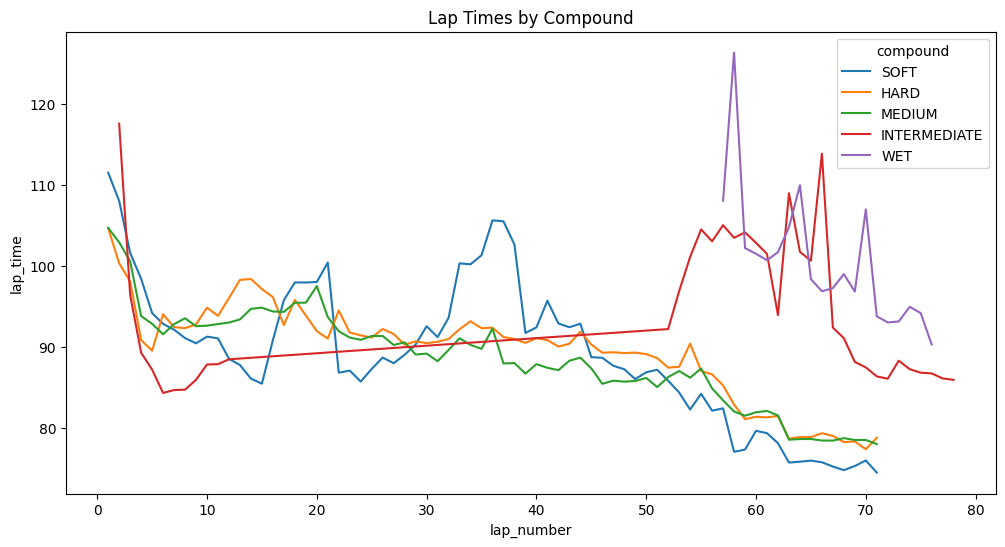

In [37]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x="lap_number", y="lap_time", hue="compound", errorbar=None)
plt.title("Lap Times by Compound")
plt.show()